<a href="https://colab.research.google.com/github/jssuriyakumar/Machine-Learning---AI/blob/main/Name_classifier_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import random
from imblearn.pipeline import Pipeline, make_pipeline
from imblearn.over_sampling import SMOTE,ADASYN,SVMSMOTE
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
import pickle

In [2]:
data_valid = pd.read_csv('dataset3_valid.csv',header=None,names=['Names'],index_col=None)
data_invalid = pd.read_csv('dataset3_invalid.csv',header=None,index_col=None)

In [3]:
data_valid_copy_1 = data_valid.copy()
data_invalid_copy = data_invalid.copy()

In [4]:
data_valid_copy_1 = data_valid_copy_1.sample(frac=1,random_state =7).reset_index(drop=True)
data_invalid_copy = data_invalid_copy.sample(frac=1,random_state =7).reset_index(drop=True)

In [5]:
cleaned_data = data_valid_copy_1

In [6]:
# adding label columns to the cleaned dataset
cleaned_data['Originality'] = 1
data_invalid_copy['Originality'] = 0

# converting dataframe to array
cleaned_data = cleaned_data[:].values
data_invalid_copy = data_invalid_copy[:].values

# stacking the valid and invalid names as single array
final_data = pd.DataFrame(np.vstack((cleaned_data,data_invalid_copy)),columns=['Names','Originality'])
final_data['Originality'] = final_data['Originality'].astype('int')

In [7]:
x_train, x_test, y_train, y_test = train_test_split(final_data['Names'], final_data['Originality'], test_size=0.2,random_state=7)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(108695,) (27174,)
(108695,) (27174,)


In [55]:
nameclassifier_mnb = Pipeline([
  ('vect', CountVectorizer()),
  ('tfidf', TfidfTransformer()),
   ('sm',SMOTE(random_state=7,)),
   ('mnb', MultinomialNB(alpha =0.01))
])

In [56]:
nameclassifier_mnb.fit(x_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('sm', SMOTE(random_state=7)),
                ('mnb', MultinomialNB(alpha=0.01))])

In [57]:
pred = nameclassifier_mnb.predict(x_test)

In [58]:
cm = confusion_matrix(y_test, pred)

In [59]:
cm

array([[ 8609,  2237],
       [ 5987, 10341]])

In [60]:
print(classification_report(y_test.astype('int'), pred))

              precision    recall  f1-score   support

           0       0.59      0.79      0.68     10846
           1       0.82      0.63      0.72     16328

    accuracy                           0.70     27174
   macro avg       0.71      0.71      0.70     27174
weighted avg       0.73      0.70      0.70     27174



0.8228113136492067


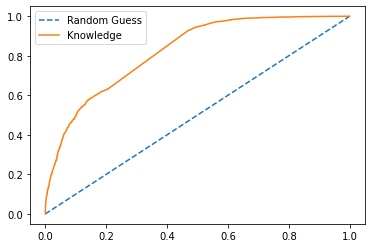

In [53]:
probabilityValues = nameclassifier_mnb.predict_proba(x_test)[:,1]

#Calc AUC
auc = roc_auc_score(y_test,probabilityValues)
print(auc)

#Calc ROC Curve
fpr,tpr,threshold = roc_curve(y_test,probabilityValues)

#Plot Skill Line
plt.plot([0,1],[0,1], linestyle = '--')

#Plot ROC Curve
plt.plot(fpr,tpr)
plt.legend(['Random Guess','Knowledge'])

In [18]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

probabilityValues = nameclassifier_mnb.predict_proba(x_test)[:,1]

#Cal PR Curve
precision,recall,t = precision_recall_curve(y_test,probabilityValues)

#Calc AUC
auc = auc(recall,precision)
print(auc)

#Plot Skill Line
plt.plot([0,1],[0.5,0.5],linestyle='--')

#plot PR
plt.plot(recall,precision)


NameError: ignored

# Logistic regression

In [62]:
nameclassifier_log_reg = Pipeline([
  ('vect', CountVectorizer()),
   ('tfidf', TfidfTransformer()),
   ('sm', SMOTE(random_state=7,sampling_strategy='minority',k_neighbors=3)),
   ('log_reg', LogisticRegression(class_weight='balanced',solver='saga',C= 500))
])

In [63]:
nameclassifier_log_reg.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('sm',
                 SMOTE(k_neighbors=3, random_state=7,
                       sampling_strategy='minority')),
                ('log_reg',
                 LogisticRegression(C=500, class_weight='balanced',
                                    solver='saga'))])

In [64]:
pred = nameclassifier_log_reg.predict(x_test)

In [65]:
cm = confusion_matrix(y_test, pred)
cm

array([[ 6096,  4750],
       [ 1387, 14941]])

In [66]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.81      0.56      0.67     10846
           1       0.76      0.92      0.83     16328

    accuracy                           0.77     27174
   macro avg       0.79      0.74      0.75     27174
weighted avg       0.78      0.77      0.76     27174



0.805513266529597


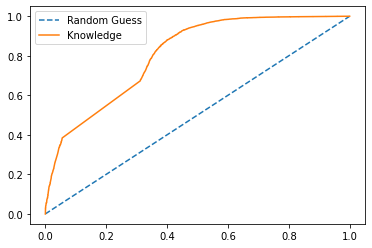

In [19]:
probabilityValues = nameclassifier_log_reg.predict_proba(x_test)[:,1]

#Calc AUC
auc = roc_auc_score(y_test,probabilityValues)
print(auc)

#Calc ROC Curve
fpr,tpr,threshold = roc_curve(y_test,probabilityValues)

#Plot Skill Line
plt.plot([0,1],[0,1], linestyle = '--')

#Plot ROC Curve
plt.plot(fpr,tpr)
plt.legend(['Random Guess','Knowledge'])

0.849914182902517


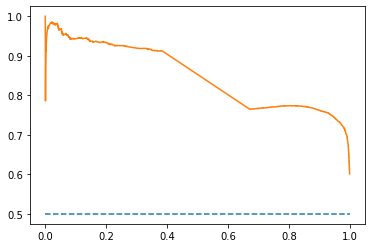

In [21]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

probabilityValues = nameclassifier_log_reg.predict_proba(x_test)[:,1]

#Cal PR Curve
precision,recall,t = precision_recall_curve(y_test,probabilityValues)

#Calc AUC
auc = auc(recall,precision)
print(auc)

#Plot Skill Line
plt.plot([0,1],[0.5,0.5],linestyle='--')

#plot PR
plt.plot(recall,precision)

In [22]:
nameclassifier_xgb = Pipeline([
  ('vect', CountVectorizer()),
   ('tfidf', TfidfTransformer()),
   ('sm', SMOTE(random_state=7,sampling_strategy='minority',k_neighbors=3)),
   ('xgb', XGBClassifier())
])

In [23]:
nameclassifier_xgb.fit(x_train,y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('sm',
                 SMOTE(k_neighbors=3, random_state=7,
                       sampling_strategy='minority')),
                ('xgb', XGBClassifier())])

In [24]:
pred = nameclassifier_xgb.predict(x_test)

In [25]:
cm = confusion_matrix(y_test, pred)
cm

array([[10132,   714],
       [10525,  5803]])

In [26]:
print(classification_report(y_test.astype('int'), pred))

              precision    recall  f1-score   support

           0       0.49      0.93      0.64     10846
           1       0.89      0.36      0.51     16328

    accuracy                           0.59     27174
   macro avg       0.69      0.64      0.58     27174
weighted avg       0.73      0.59      0.56     27174



0.7037983350353346


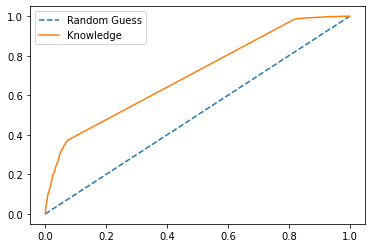

In [36]:
probabilityValues = nameclassifier_xgb.predict_proba(x_test)[:,1]

#Calc AUC
auc = roc_auc_score(y_test,probabilityValues)
print(auc)

#Calc ROC Curve
fpr,tpr,threshold = roc_curve(y_test,probabilityValues)

#Plot Skill Line
plt.plot([0,1],[0,1], linestyle = '--')

#Plot ROC Curve
plt.plot(fpr,tpr)
plt.legend(['Random Guess','Knowledge'])

0.8215444135400342


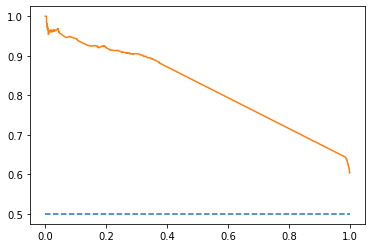

In [30]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

probabilityValues = nameclassifier_xgb.predict_proba(x_test)[:,1]

#Cal PR Curve
precision,recall,t = precision_recall_curve(y_test,probabilityValues)

#Calc AUC
auc = auc(recall,precision)
print(auc)

#Plot Skill Line
plt.plot([0,1],[0.5,0.5],linestyle='--')

#plot PR
plt.plot(recall,precision)

In [44]:
nameclassifier_svc = Pipeline([
  ('vect', CountVectorizer()),
   ('tfidf', TfidfTransformer()),
   ('sm', SMOTE(random_state=7,sampling_strategy='minority',k_neighbors=3)),
   ('svc', SVC(
               class_weight='balanced',C=50,probability=True))
])

In [ ]:
nameclassifier_svc.fit(x_train,y_train)

In [ ]:
pred = nameclassifier_svc.predict(x_test)

In [ ]:
cm = confusion_matrix(y_test, pred)
cm

In [ ]:
print(classification_report(y_test.astype('int'), pred))

In [ ]:
probabilityValues = nameclassifier_svc.predict_proba(x_test)[:,1]

#Calc AUC
auc = roc_auc_score(y_test,probabilityValues)
print(auc)

#Calc ROC Curve
fpr,tpr,threshold = roc_curve(y_test,probabilityValues)

#Plot Skill Line
plt.plot([0,1],[0,1], linestyle = '--')

#Plot ROC Curve
plt.plot(fpr,tpr)
plt.legend(['Random Guess','Knowledge'])

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

probabilityValues = nameclassifier_svc.predict_proba(x_test)[:,1]

#Cal PR Curve
precision,recall,t = precision_recall_curve(y_test,probabilityValues)

#Calc AUC
auc = auc(recall,precision)
print(auc)

#Plot Skill Line
plt.plot([0,1],[0.5,0.5],linestyle='--')

#plot PR
plt.plot(recall,precision)

In [67]:
#save the model to disk

filename = 'finalized_model.sav'
pickle.dump(nameclassifier_log_reg, open(filename, 'wb'))
 


In [68]:
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
pred = loaded_model.predict(x_test,)

In [69]:
cm = confusion_matrix(y_test, pred)
cm

array([[ 6096,  4750],
       [ 1387, 14941]])

In [70]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.81      0.56      0.67     10846
           1       0.76      0.92      0.83     16328

    accuracy                           0.77     27174
   macro avg       0.79      0.74      0.75     27174
weighted avg       0.78      0.77      0.76     27174

